# 1. Linear Regression Numpy Implementation

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50)

In [3]:
X.shape

(100, 1)

In [4]:
def plotLine(theta0, theta1, X, y):
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100


    xplot = np.linspace(min_x, max_x, 1000)
    yplot = theta0 + theta1 * xplot



    plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

    plt.scatter(X,y)
    plt.axis([-10, 10, 0, 200])
    plt.show()

In [5]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x)  # f(X) = w1*x + w0

def cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    return costValue

def derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha): #alpha > learning rate
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [6]:
def LinearRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

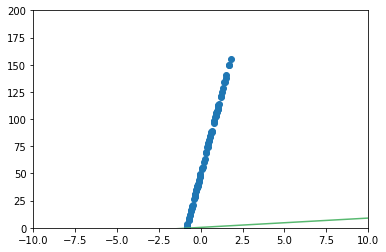

[273400.03219659]


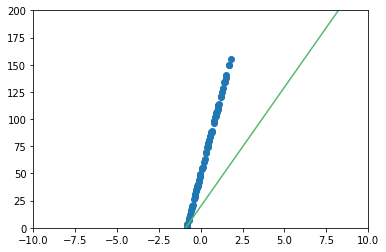

[107413.81973188]


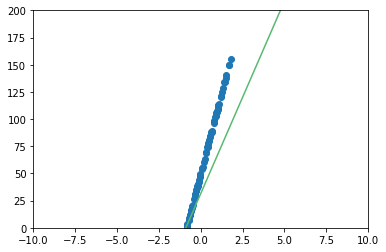

[42292.5247562]


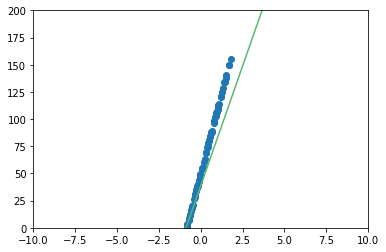

[16688.52138493]


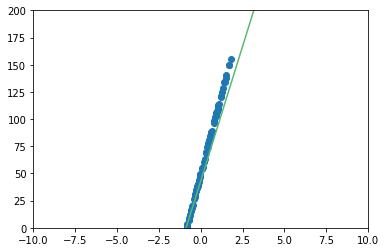

[6600.89206864]


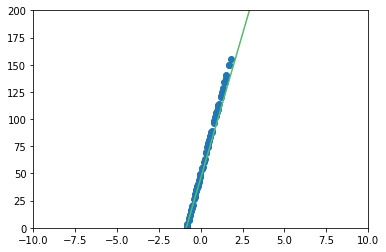

[2618.6536088]


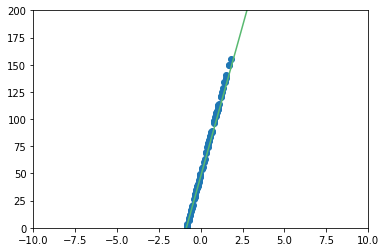

[1043.6507446]


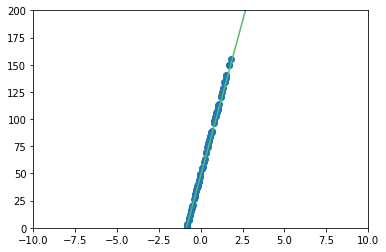

[419.6150271]


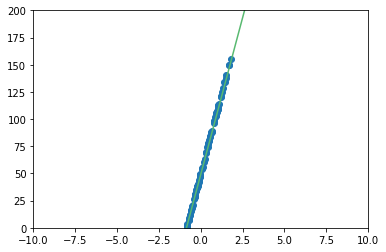

[171.94743593]


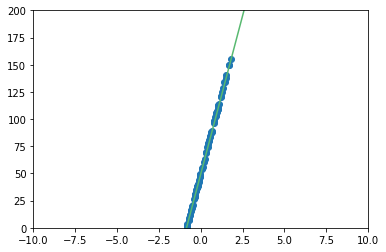

[73.49688344]


In [7]:
LinearRegression(X, y)

# 2. Ridge Regression Numpy Implementation

In [23]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Ridge_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    penalty = 0.01* theta1 ** 2
    costValue += penalty
    return costValue

def Ridge_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    dtheta1 += 2 * 0.01 * theta1

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Ridge_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [24]:
def RidgeRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Ridge_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

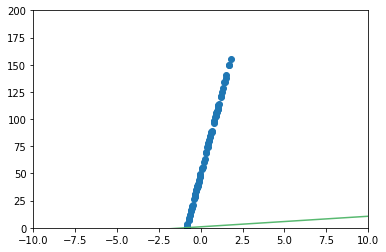

[270168.53873443]


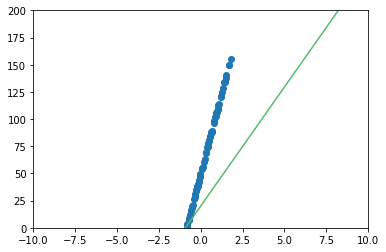

[106540.5689494]


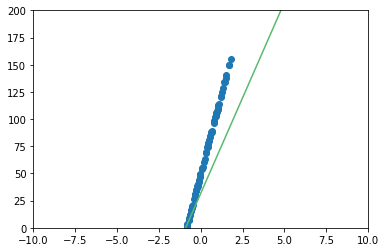

[42491.52327736]


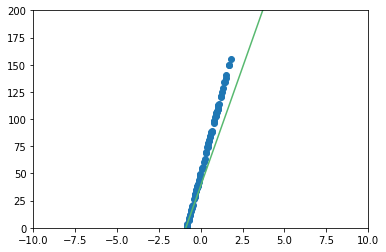

[17245.8150934]


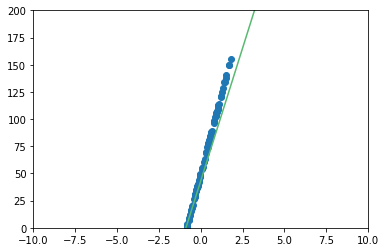

[7193.84746092]


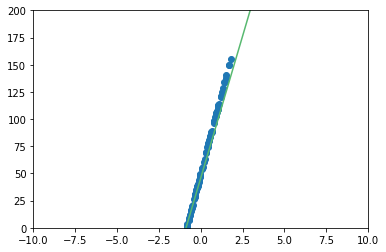

[3131.78573398]


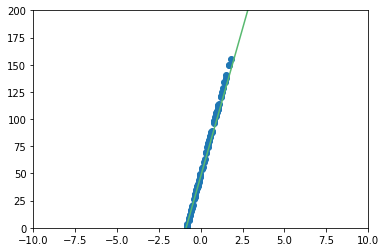

[1454.65081207]


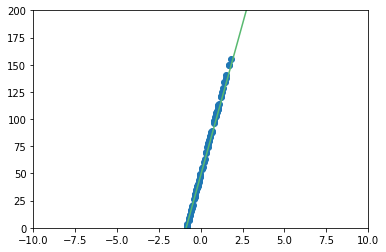

[740.97594402]


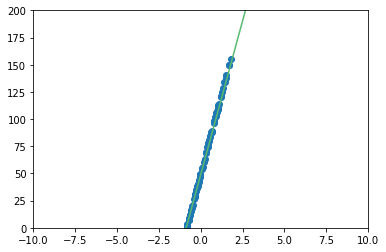

[424.80560148]


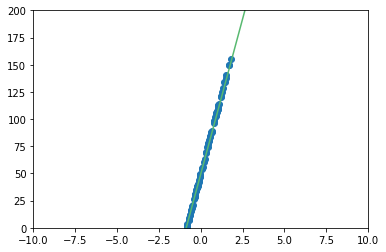

[277.57766432]


In [25]:
RidgeRegression(X, y)

# 3. Lasso Regression Numpy Implementation

In [27]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def Lasso_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    
    penalty = 0.01* np.abs(theta1)
    costValue += penalty
    return costValue

def Lasso_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    if theta1 >=0:
        dtheta1 += 0.01 * 1
    else:
        dtheta1 += 0.01 * (-1)
        
        
    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = Lasso_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [28]:
def LassoRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(Lasso_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

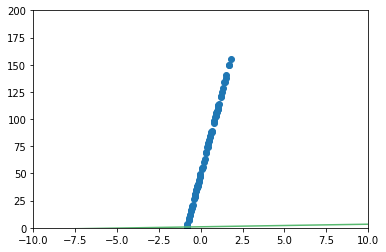

[273974.34699364]


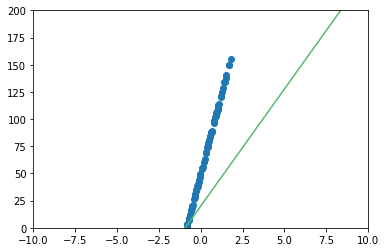

[107760.0683055]


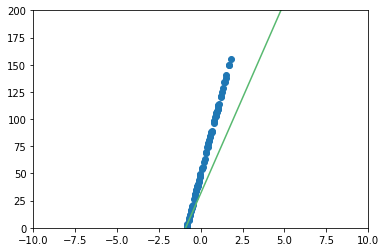

[42478.35235842]


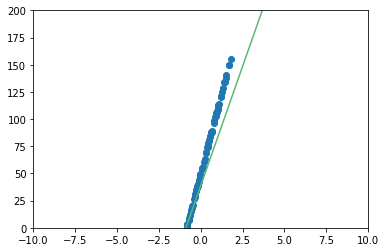

[16783.09598412]


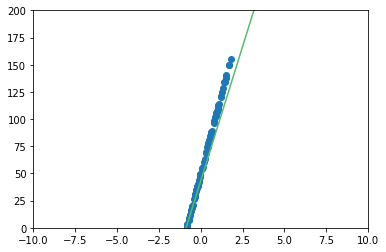

[6648.01816508]


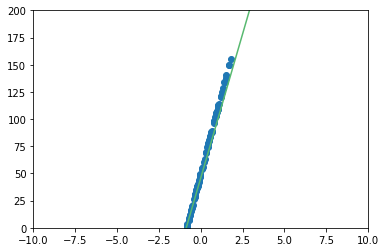

[2642.169081]


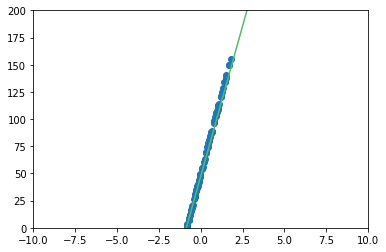

[1055.64269985]


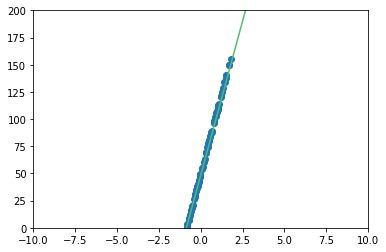

[425.99711286]


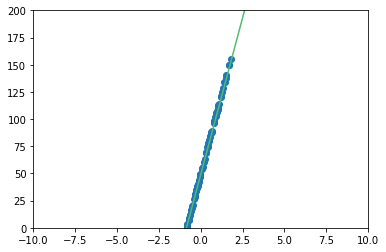

[175.56891915]


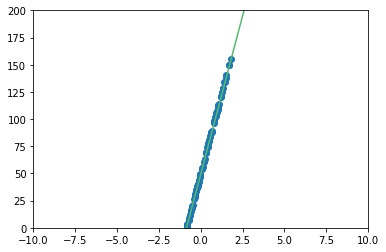

[75.72993867]


In [29]:
LassoRegression(X, y)

# 4. ElasticNet Numpy Implementation  (HW1)

In [37]:
def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def EN_cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
        
    penalty = (0.01*theta1*theta1) + (0.01*np.abs(theta1))
    costValue += penalty
    return costValue

def EN_derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)
    
    dtheta1 = 2*0.01*theta1 #ridge
    
    if theta1 >=0: #lasso
        dtheta1 += 0.01 * 1
    else:
        dtheta1 += 0.01 * (-1)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = EN_derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [38]:
def ENRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
            print(EN_cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)

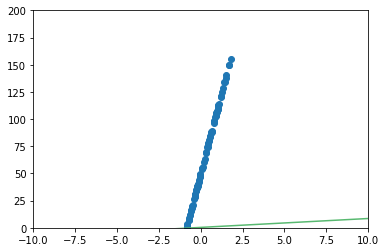

[273624.48231996]


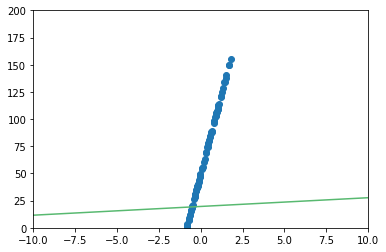

[198165.84567546]


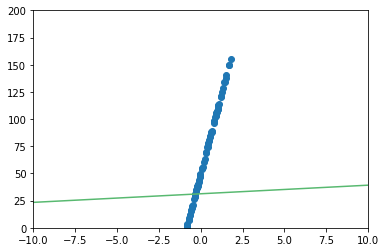

[170518.9867429]


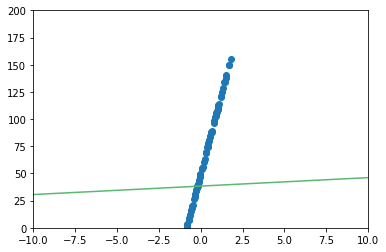

[160416.54978511]


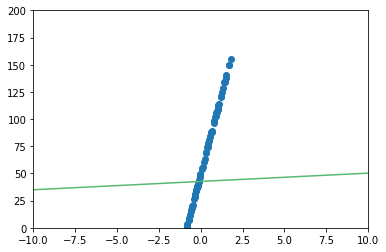

[156751.72153623]


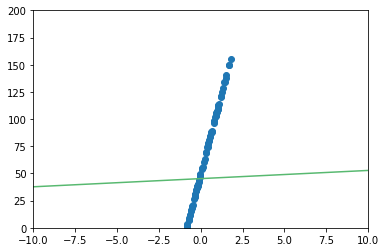

[155448.78934647]


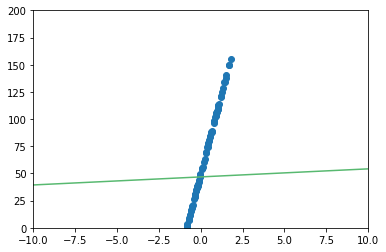

[155012.15173351]


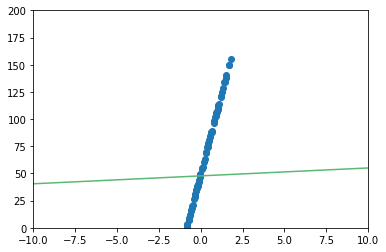

[154892.99545712]


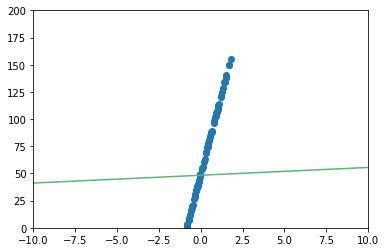

[154889.936376]


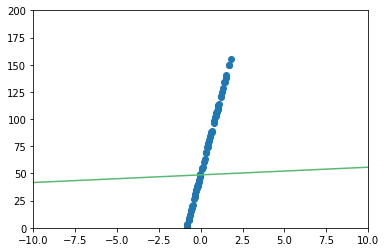

[154929.08080978]


In [39]:
ENRegression(X, y)